In [17]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_184796/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [18]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

In [19]:
X , y = mnist["data"] , mnist["target"]

In [20]:
rows = int(X.shape[0] * 0.7)
X_train , y_train = X[0:rows] , y[0:rows]
X_test, y_test = X[rows:] , y[rows:]

In [21]:
X_train_69 = pd.concat([X_train[y_train =='6'],X_train[y_train=='9']],axis=0)
X_test_69 = pd.concat([ X_test[y_test == '6'] , X_test[y_test == '9'] ] , axis=0)
y_train_69 = pd.concat([y_train[y_train =='6'],y_train[y_train=='9']],axis=0)
y_test_69 = pd.concat([ y_test[y_test == '6'] , y_test[y_test == '9'] ] , axis=0)

In [22]:
y_test_69 = y_test_69.apply(lambda value : '1' if value == '6' else '0')
y_train_69 = y_train_69.apply(lambda value : '1' if value == '6' else '0')

In [23]:
from sklearn.utils import shuffle

X_train_69 , y_train_69 = shuffle(X_train_69 , y_train_69 , random_state=1729)

### Q1) Train the LogisticRegression model using SGDClassifier() with the following common settings.

1. No Regularization
2. random_state : 10
3. Iteration : 30
   
Capture the loss for each iteration and plot the iteration vs loss curve. **For which of the following settings, the iteration vs loss curve converged quickly to zero loss?**

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . 

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples. 

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).



In [24]:
from sklearn.metrics import log_loss

iterations = 30

In [25]:
from sklearn.linear_model import SGDClassifier

clf_A = SGDClassifier(loss='log_loss' , alpha=0 , max_iter=1 , warm_start=True,learning_rate='constant',eta0=0.01 ,random_state=10)

In [26]:
loss = []

for i in range(iterations):
    clf_A.fit(X_train_69 , y_train_69)
    y_pred = clf_A.predict(X_train_69)
    loss.append(log_loss(y_train_69 , y_pred))

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Text(0, 0.5, 'Log Loss')

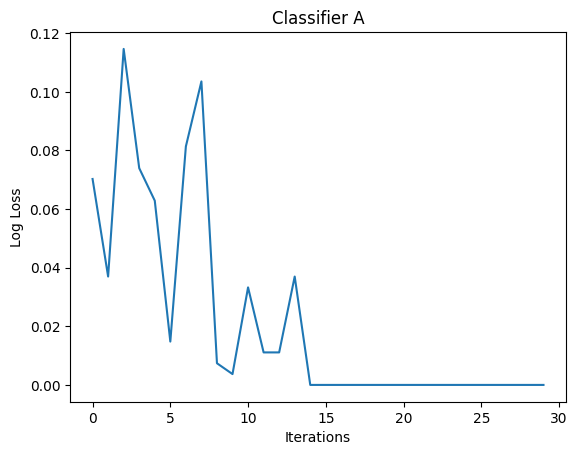

In [27]:
plt.plot(range(iterations) , loss)
plt.title("Classifier A")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")

In [28]:
from sklearn.linear_model import SGDClassifier

clf_B = SGDClassifier(loss='log_loss' , alpha=0 , max_iter=1 , warm_start=True,learning_rate='constant',eta0=0.000001  ,random_state=10)

In [29]:
loss = []

for i in range(iterations):
    clf_B.fit(X_train_69 , y_train_69)
    y_pred = clf_B.predict(X_train_69)
    loss.append(log_loss(y_train_69 , y_pred))

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Text(0, 0.5, 'Log Loss')

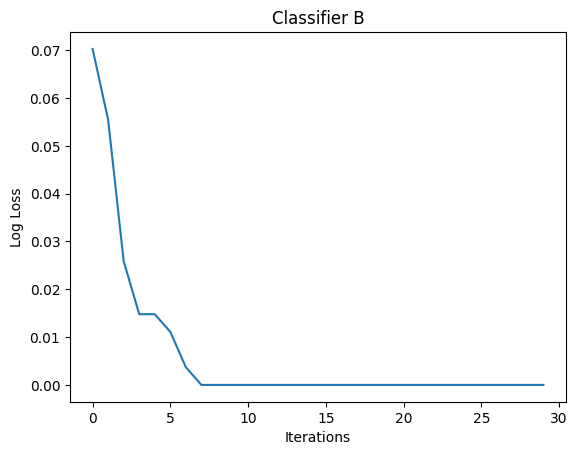

In [30]:
plt.plot(range(iterations) , loss)
plt.title("Classifier B")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")

In [31]:
from sklearn.linear_model import SGDClassifier

clf_C = SGDClassifier(loss='log_loss' , alpha=0 , max_iter=1 , warm_start=True,learning_rate='constant',eta0=0.01 ,random_state=10)

In [32]:
from sklearn.preprocessing import StandardScaler

X_train_69_scaled = StandardScaler().fit_transform(X_train_69)

In [33]:
loss = []

for i in range(iterations):
    clf_C.fit(X_train_69_scaled , y_train_69)
    y_pred = clf_C.predict(X_train_69_scaled)
    loss.append(log_loss(y_train_69 , y_pred))

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Text(0, 0.5, 'Log Loss')

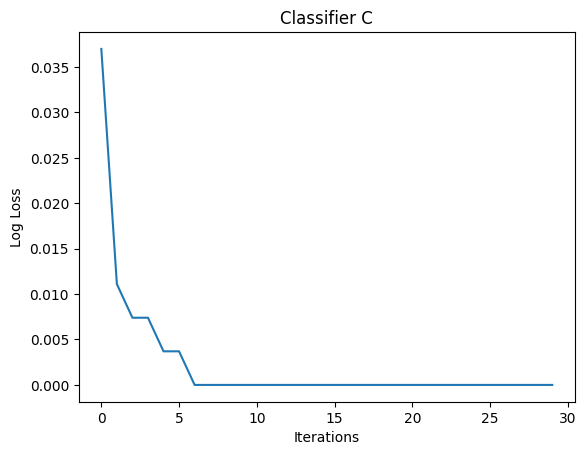

In [34]:
plt.plot(range(iterations) , loss)
plt.title("Classifier C")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")

In [35]:
from sklearn.linear_model import SGDClassifier

clf_D = SGDClassifier(loss='log_loss' , alpha=0 , max_iter=1 , warm_start=True,learning_rate='invscaling',eta0=0.01 ,random_state=10 , power_t=1)

In [36]:
loss = []

for i in range(iterations):
    clf_D.fit(X_train_69 , y_train_69)
    y_pred = clf_D.predict(X_train_69)
    loss.append(log_loss(y_train_69 , y_pred))

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Text(0, 0.5, 'Log Loss')

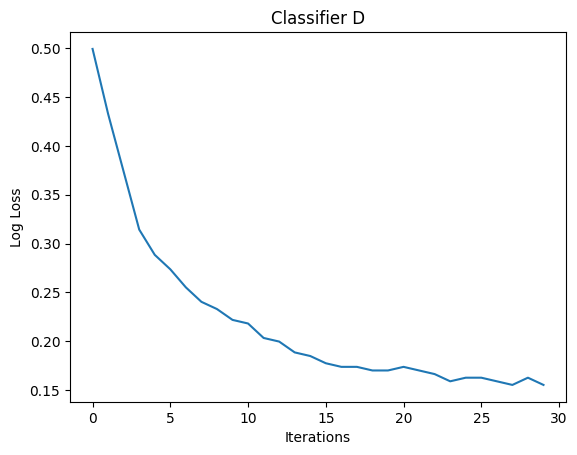

In [37]:
plt.plot(range(iterations) , loss)
plt.title("Classifier D")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")

### Q3) Create the classifier with the following settings

1. No Regularization
2. eta0 = 0.5
3. learning_rate = 'inv_scaling'
4. power_t = 0.5
5. iterations = 10
6. Shuffle = True
7. random_state = 10

Train the classifier with x_train_69. Answer the following questions?

How many false positives (FP) are there in the predictions made on training samples?


In [38]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(alpha=0 ,max_iter=10, warm_start=True,learning_rate='invscaling',eta0=0.5 ,random_state=10 , power_t=0.5 , shuffle=True)

In [39]:
# for i in range(10):
clf.fit(X_train_69 , y_train_69)
y_pred = clf.predict(X_train_69)

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [40]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_69 , y_pred).ravel())

[4879   12    9 4846]


### Q4) Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index.

In [41]:
y_train_69[(y_pred == '1') & (y_train_69 == '0')].index.min()

80

### Q5) Load '20newsgroups' data.
 
Vectorize the data using TfidfVectorizer. Which of the following options represent the shape of the fitted and transformed dataset??

In [42]:
from sklearn.datasets import fetch_20newsgroups

news_X , news_y = fetch_20newsgroups(return_X_y=True)
# news_test = fetch_20newsgroups(subset='test')

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit_transform(news_X).toarray().shape

(11314, 130107)

### Q6) Split the data into train and test using train_test_split with test_size = 0.3 and random_state = 0.

Use MultinomialNB to train the model.

Compute test score.

In [44]:
news_X = tfidf.fit_transform(news_X).toarray()

In [45]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train ,y_test = train_test_split(news_X , news_y , test_size=0.3 , random_state=0)

In [46]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train , y_train)

MultinomialNB()

In [47]:
clf.score(X_test , y_test)

0.8427098674521355